# To answer questions:
### - Do I need a Master or Ph.D degree for a Data Science job?
### - Is learning python a really good choice for my intention of working in Data Science

## Web crawl, pandas, matplotlib exercise

Step 1: Make a list of link to each job

Step 2: Go to each link and scrape for information

Step 3: Make stats comparision

In [46]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import time
import re
import matplotlib.pyplot as plt

In [3]:
# Study the web

url = 'https://vn.indeed.com/Vi%E1%BB%87c-l%C3%A0m?q=data+science&l='
source_doc = requests.get(url).text
source_tree = BeautifulSoup(source_doc, 'html.parser')

In [4]:
#How many jobs posted

job_count_string = source_tree.find(id = 'searchCount').contents[0]
job_count_string = job_count_string.split()[-1]
print('Search yielded {} hit'.format(job_count_string))
job_count = int(job_count_string)

Search yielded 358 hit


In [5]:
'''Go to each page and scrape'''

num_pages = int(job_count // 10)

base_url = 'https://vn.indeed.com'
job_links = []

for i in range(num_pages + 1):
    if i == 0:
        url = 'https://vn.indeed.com/Vi%E1%BB%87c-l%C3%A0m?q=data+science&l='
    else:
        url = 'https://vn.indeed.com/Vi%E1%BB%87c-l%C3%A0m?q=data+science&start=' + str(i*10)
    
    html_page = requests.get(url).text
    bs_tree = BeautifulSoup(html_page, 'html.parser')
    job_area = bs_tree.find(id = 'resultsCol')
    job_post = job_area.findAll('div')
    job_post = [jp for jp in job_post if not jp.get('class') is None
               and ''.join(jp.get('class')) == 'rowresult']
    job_ids = [jp.get('data-jk') for jp in job_post]
    
    for ids in job_ids:
        job_links.append(base_url + '/viewjob?jk=' + ids)
        
    time.sleep(1)

print('We found {} jobs'.format(len(job_links)))

We found 339 jobs


In [9]:
'''
Go to each link and scrape for information
'''

def job_description():
    counter = 1
    job_description = []
    for link in job_links:
        try:
            html_page = requests.get(link).text
        except:
            return

        html_text = BeautifulSoup(html_page, 'html.parser')
        
        for script in html_text(["script", "style"]):
            script.extract()
        text = html_text.get_text()
        job_description.append(text)

        counter += 1
        time.sleep(1)
    
    return job_description

JD = job_description()

## Make statistics comparision


In [33]:
languages = {'Python': 0, "R": 0, 'Java': 0, 'PHP':0}
db_skills = {'sql': 0, 'mysql':0, 'mongodb': 0}
degrees = {'Bachelor': 0, 'Ph.D': 0, 'Master': 0}

def requirement(requirement):
    for jd in JD:
        for key in requirement.keys():
            if key in jd:
                requirement[key] += 1
    return requirement

rq_language = requirement(languages)
rq_degrees = requirement(degrees)

In [34]:
print(rq_language)
print(rq_degrees)

{'Python': 67, 'PHP': 55, 'R': 330, 'Java': 132}
{'Bachelor': 157, 'Ph.D': 8, 'Master': 44}


### *SUBJECT TO BE IMPROVED FROM HERE

In [82]:
language_df = pd.DataFrame(list(rq_language.items()), index=rq_language.keys(), columns=['Language', 'Mentions'])
degrees_df = pd.DataFrame(list(rq_degrees.items()), index=rq_degrees.keys(), columns=['Degree', 'Mentions'])

In [83]:
language_df

,Language,Mentions
Python,Python,67
PHP,PHP,55
R,R,330
Java,Java,132


In [84]:
degrees_df

,Degree,Mentions
Bachelor,Bachelor,157
Ph.D,Ph.D,8
Master,Master,44


## Visualization

Text(0.5,1,'Mentions of programming languages in Data Science jobs search from vn.indeed.com')

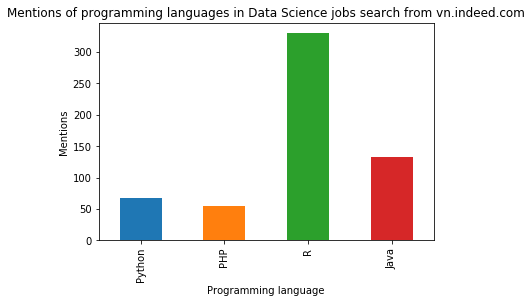

In [85]:
lang_fig = language_df['Mentions'].plot(kind='bar')
lang_fig.set_ylabel('Mentions')
lang_fig.set_xlabel('Programming language')
lang_fig.set_title('Mentions of programming languages in Data Science jobs search from vn.indeed.com')

Text(0.5,1,'Mentions of degree level in Data Science jobs search from vn.indeed.com')

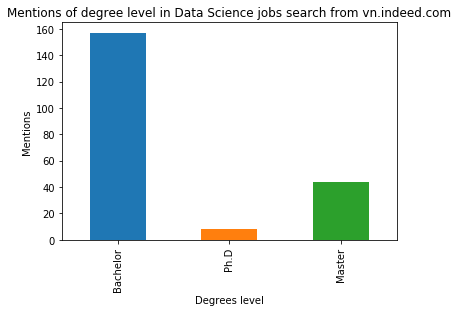

In [86]:
deg_fig = degrees_df['Mentions'].plot(kind='bar')
deg_fig.set_ylabel('Mentions')
deg_fig.set_xlabel('Degrees level')
deg_fig.set_title('Mentions of degree level in Data Science jobs search from vn.indeed.com')